<a href="https://colab.research.google.com/github/LeoVogiatzis/medical_data_analysis/blob/main/iml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install orange3
!pip install eli5
!pip install shap
!pip install pdpbox

In [64]:
from sklearn import datasets,model_selection
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from ipywidgets import interactive

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

In [66]:
data = pd.read_csv('/content/cleaned_data_cardio.csv')
# split data into X and y
x_train, x_test, y_train, y_test = model_selection.train_test_split(data.drop('cardio', axis=1),
                                                        data['cardio'], test_size=0.2)

In [67]:
lin_model = LogisticRegression(penalty='l2',max_iter=1000,C=100,random_state=0)
#lin_model = LogisticRegression(solver="liblinear",penalty='l1',max_iter=1000,C=10,random_state=0)
lin_model.fit(x_train, y_train)
predicted_train = lin_model.predict(x_train)
predicted_test = lin_model.predict(x_test)
predicted_proba_test = lin_model.predict_proba(x_test)
print("Logistic Regression Model Performance:")
print("Accuracy in Train Set",accuracy_score(y_train, predicted_train))
print("Accuracy in Test Set",accuracy_score(y_test, predicted_test))

Logistic Regression Model Performance:
Accuracy in Train Set 0.7175757575757575
Accuracy in Test Set 0.7177822959024085


In [72]:
target_names= list(data['cardio'])
print(f'target data:{target_names}')
data.drop('cardio', axis=True, inplace=True)
data.head()

target data:[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,pulse
0,0,50,2,5.123964,4.127134,110,80,1,1,0,0,1,21.967120,30.0
1,1,55,1,5.049856,4.442651,140,90,3,1,0,0,1,34.927679,50.0
2,2,51,1,5.105945,4.158883,130,70,3,1,0,0,0,23.507805,60.0
3,3,48,2,5.129899,4.406719,150,100,1,1,0,0,1,28.710479,50.0
4,4,47,1,5.049856,4.025352,100,60,1,1,0,0,0,23.011177,40.0


the coeficients are:[[ 3.03853939e-07  3.41925990e-02 -3.49776784e-01 -1.21852957e+00
  -8.00450104e-01  3.72960398e-02  2.09979579e-02  5.90437145e-01
   5.96817067e-03 -8.10679634e-02 -3.71845906e-02 -2.76338386e-01
   3.15170995e-02  1.62980818e-02]]
the type is<class 'list'>
Number of features: 14


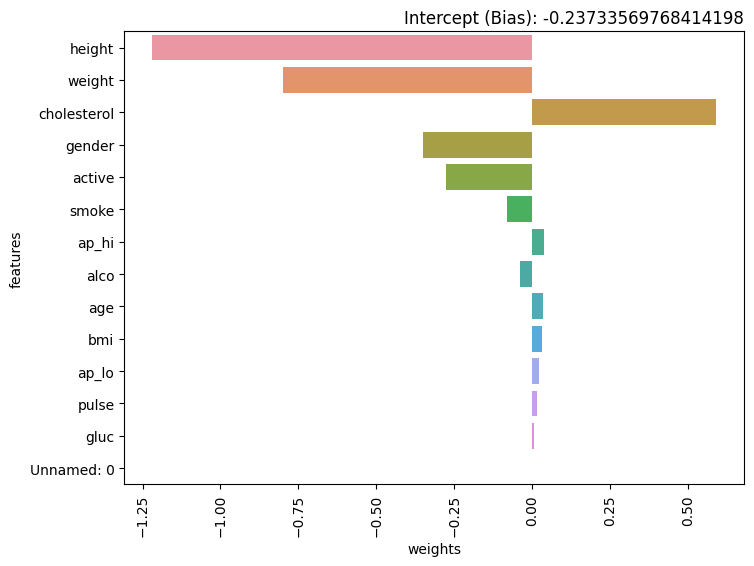

In [73]:

weights = lin_model.coef_
print(f'the coeficients are:{weights}')
feature_names = list(data.columns)
print(f'the type is{type(feature_names)}')
model_weights = pd.DataFrame({ 'features': feature_names,'weights': list(weights[0])})
#model_weights = model_weights.sort_values(by='weights', ascending=False) #Normal sort
model_weights = model_weights.reindex(model_weights['weights'].abs().sort_values(ascending=False).index) #Sort by absolute value
model_weights = model_weights[(model_weights["weights"] != 0)]    
print("Number of features:",len(model_weights.values))
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x="weights", y="features", data=model_weights)
plt.title("Intercept (Bias): "+str(lin_model.intercept_[0]),loc='right')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report

import eli5
from eli5.sklearn import PermutationImportance
print(target_names)
print("XGBoost Performance on Breast Cancer:")
model = xgboost.XGBClassifier().fit(x_train,y_train)
y_preds = model.predict(x_test)
print(classification_report(y_test,y_preds,data['cardio']))
perm = PermutationImportance(model).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = feature_names)

[0 1 1 ... 1 1 0]
XGBoost Performance on Breast Cancer:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Weight,Feature
0.1530 ± 0.0080,ap_hi
0.0278 ± 0.0035,cholesterol
0.0206 ± 0.0035,age
0.0027 ± 0.0023,ap_lo
0.0022 ± 0.0022,bmi
0.0014 ± 0.0012,active
0.0003 ± 0.0014,gluc
0.0001 ± 0.0007,alco
0.0001 ± 0.0007,Unnamed: 0
-0.0000 ± 0.0007,smoke


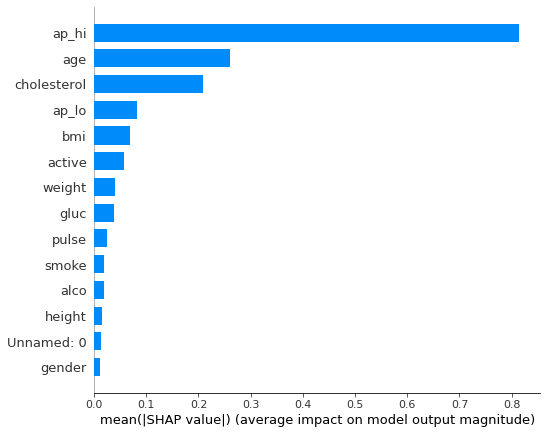

In [80]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

<class 'numpy.ndarray'> 51150 12788


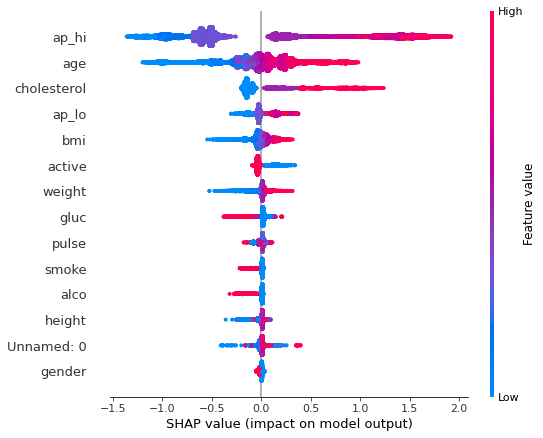

In [88]:

import matplotlib.pyplot as plt
f = plt.figure()
print(type(shap_values), len(shap_values), len(x_test))
shap.summary_plot(shap_values, x_train)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

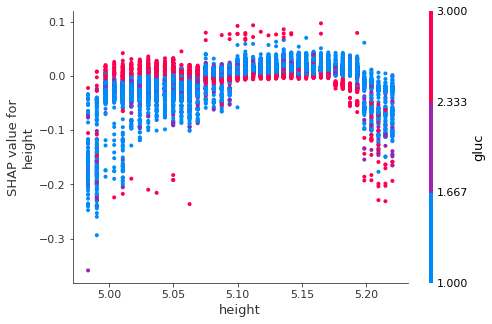

In [92]:
shap.dependence_plot('height', shap_values, x_train)

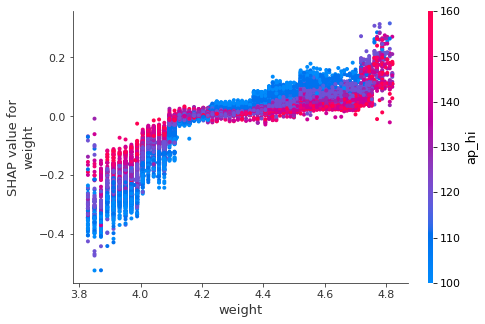

In [95]:
shap.dependence_plot('weight', shap_values, x_train)

In [97]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [98]:
shap_plot(0)

NameError: ignored

In [ ]:
from IPython.display import SVG
from IPython.display import display                               
from sklearn.metrics import accuracy_score

def plot_sensor(instance=0):
  random_instance = x_test[instance]
  print("Original Class:",target_names[y_test[instance]]+", Predicted Class:",target_names[predicted_test[instance]],"with probability of",predicted_proba_test[instance][predicted_test[instance]])
  weights = lin_model.coef_
  summation = sum(weights[0]*random_instance)
  bias = lin_model.intercept_[0]
  res = ""
  if (summation + bias > 0):
    res = " > 0 -> 1"
  else:
    res = " <= 0 -> 0"
  print("Sum(weights*instance): "+str(summation)+" + Intercept (Bias): "+str(bias)+" = "+ str(summation+bias)+ res)
  model_weights = pd.DataFrame({ 'features': list(feature_names),'weights*values': list(weights[0]*random_instance)})
  #model_weights = model_weights.sort_values(by='weights*values', ascending=False)
  model_weights = model_weights.reindex(model_weights['weights*values'].abs().sort_values(ascending=False).index) #Sort by absolute value
  model_weights = model_weights[(model_weights["weights*values"] != 0)]    
  print("Number of features:",len(model_weights.values))
  plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
  sns.barplot(x="weights*values", y="features", data=model_weights)
  plt.xticks(rotation=90)
  plt.show()
inter=interactive(plot_sensor 
   , instance=(0,9))
display(inter)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)
print("Simple Decision Tree Performance:")
print("Accuracy in Train Set",accuracy_score(y_train, y_train_pred))
print("Accuracy in Test Set",accuracy_score(y_test, y_pred))

Simple Decision Tree Performance:
Accuracy in Train Set 0.709227761485826
Accuracy in Test Set 0.7073037222395996


In [ ]:
model.feature_importances_

array([0.        , 0.09939671, 0.        , 0.        , 0.        ,
       0.90060329, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:

from sklearn.tree import export_graphviz
from IPython.display import SVG
from IPython.display import display                               
from ipywidgets import interactive
from graphviz import Source

def plot_tree(depth):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = 'gini'
          , max_depth = depth)
    estimator.fit(x_train, y_train)
    graph = Source(export_graphviz(estimator
          , out_file=None
          , feature_names=feature_names
          , class_names=target_names
          , filled = True))
    print(accuracy_score(y_test, estimator.predict(x_test)))
    display(SVG(graph.pipe(format='svg')))
    return estimator
inter=interactive(plot_tree 
   , depth=(1,5))
display(inter)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def plot_trees_graph(depth):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = 'gini'
          , max_depth = depth)
    estimator.fit(x_train, y_train)
    weights = estimator.feature_importances_
    model_weights = pd.DataFrame({ 'features': list(feature_names),'weights': list(weights)})
    model_weights = model_weights.sort_values(by='weights', ascending=False)
    plt.figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
    sns.barplot(x="weights", y="features", data=model_weights)
    plt.xticks(rotation=90)
    plt.show()
    return estimator
inter=interactive(plot_trees_graph 
   , depth=(1,5))
display(inter)

interactive(children=(IntSlider(value=3, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

In [ ]:
import Orange
import Orange.evaluation.scoring
import Orange.classification.rules
import Orange.evaluation

learner = Orange.classification.rules.CN2Learner()
data = Orange.data.Table(x_train, y_train)
print("CN2 Ordered with Entropy Performance:")
def plot_rules(bw, mce, mrl):
    learner.rule_finder.quality_evaluator = Orange.classification.rules.EntropyEvaluator()
    learner.rule_finder.search_algorithm.beam_width = bw
    learner.rule_finder.general_validator.min_covered_examples = mce
    learner.rule_finder.general_validator.max_rule_length = mrl
    mymodel = learner.fit_storage(data)
    predicted = mymodel.predict(np.asarray(x_test))
    mypred = []
    for iii in predicted:
        if (iii[0] >= iii[1]):
            mypred.append(0)
        else:
            mypred.append(1)
    print(classification_report(y_test,y_pred,target_names=target_names))
    model = learner(data)
    for rule in model.rule_list:
        rule = str(rule).replace("Class=v1", "malignant").replace("Class=v2", "benign")
        for i in range(len(feature_names)-1,0,-1):
            num = ""
            if i<10:
                num = "0"+str(i)
            else:
                num = str(i)
            rule = rule.replace("Feature "+num, "("+ feature_names[i] + ")")
        print(rule)
    print()
    return learner

inter=interactive(plot_rules 
                ,bw = [3,5,8,10]
                ,mce = [7,9,11]
                ,mrl = [2,3,5,10])
display(inter)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


CN2 Ordered with Entropy Performance:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: OrangeDeprecationWarning: Omitting domain in a call to Table(X, Y, metas), is deprecated and will be removed. Call Table.from_numpy(None, X, Y, metas) instead.
  import sys


interactive(children=(Dropdown(description='bw', options=(3, 5, 8, 10), value=3), Dropdown(description='mce', …